**Author:** [Riccardo Guidotti](http://kdd.isti.cnr.it/people/riccardo-guidotti)  
**Python version:**  3.x

In [50]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict

# Data Preparation

In [51]:
class_name = 'Occupancy'
df = pd.read_csv('occupancy_data/datatraining.txt', skipinitialspace=True, na_values='?', keep_default_na=True)
df.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [52]:
df.mean()

Temperature       20.619084
Humidity          25.731507
Light            119.519375
CO2              606.546243
HumidityRatio      0.003863
Occupancy          0.212330
dtype: float64

In [54]:
df['daytime'] = [pd.to_datetime(d.hour) for d in pd.to_datetime(df['date'])]
df['weekend'] = [1 if d.weekday() >= 5 else 0 for d in pd.to_datetime(df['date'])]
columns2remove = ['date']
df.drop(columns2remove, inplace=True, axis=1)
df.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,daytime,weekend
1,23.18,27.2720,426.0,721.25,0.004793,1,1970-01-01 00:00:00.000000017,0
2,23.15,27.2675,429.5,714.00,0.004783,1,1970-01-01 00:00:00.000000017,0
3,23.15,27.2450,426.0,713.50,0.004779,1,1970-01-01 00:00:00.000000017,0
4,23.15,27.2000,426.0,708.25,0.004772,1,1970-01-01 00:00:00.000000017,0
5,23.10,27.2000,426.0,704.50,0.004757,1,1970-01-01 00:00:00.000000017,0


In [5]:
df0 = df.copy()

In [6]:
dfX = pd.get_dummies(df[[c for c in df.columns if c != class_name]], prefix_sep='=')
dfY = df[class_name]
df = pd.concat([dfX, dfY], axis=1)
df.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,date=2015-02-04 17:51:00,date=2015-02-04 17:51:59,date=2015-02-04 17:53:00,date=2015-02-04 17:54:00,date=2015-02-04 17:55:00,...,date=2015-02-10 09:24:59,date=2015-02-10 09:26:00,date=2015-02-10 09:27:00,date=2015-02-10 09:28:00,date=2015-02-10 09:29:00,date=2015-02-10 09:29:59,date=2015-02-10 09:30:59,date=2015-02-10 09:32:00,date=2015-02-10 09:33:00,Occupancy
1,23.18,27.2720,426.0,721.25,0.004793,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,23.15,27.2675,429.5,714.00,0.004783,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,23.15,27.2450,426.0,713.50,0.004779,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,23.15,27.2000,426.0,708.25,0.004772,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
5,23.10,27.2000,426.0,704.50,0.004757,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [7]:
numeric_columns = ['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']

In [8]:
X = df[numeric_columns].values

In [9]:
y = df[class_name]

In [10]:
X.shape

(8143, 5)

In [11]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

In [13]:
X1 = df0[[c for c in df0.columns if c not in numeric_columns]].values

In [14]:
X1

array([['2015-02-04 17:51:00', 1],
       ['2015-02-04 17:51:59', 1],
       ['2015-02-04 17:53:00', 1],
       ...,
       ['2015-02-10 09:30:59', 1],
       ['2015-02-10 09:32:00', 1],
       ['2015-02-10 09:33:00', 1]], dtype=object)

In [15]:
X2 = df[[c for c in df.columns if c not in numeric_columns and c != class_name]].values

In [16]:
X2

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=uint8)

# Gaussian Mixture

In [17]:
from sklearn.mixture import GaussianMixture

covariance_type

- 'full': each component has its own general covariance matrix
- 'tied': all components share the same general covariance matrix
- 'diag': each component has its own diagonal covariance matrix
- 'spherical': each component has its own single variance

In [18]:
gm = GaussianMixture(n_components=1, random_state=0, covariance_type='full')
gm.fit(X_train)

y_pred = gm.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))

Accuracy 0.787556283258289
F1-score [0.88115411 0.        ]


In [19]:
gm = GaussianMixture(n_components=2, random_state=0, covariance_type='full')
gm.fit(X_train)

y_pred = gm.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))

Accuracy 0.8100695865738846
F1-score [0.86288416 0.69107856]


In [20]:
gm = GaussianMixture(n_components=2, random_state=0, covariance_type='spherical')
gm.fit(X_train)

y_pred = gm.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))

Accuracy 0.8096602537863283
F1-score [0.86254803 0.69061876]


In [21]:
gm.means_

array([[2.00166235e+01, 2.52223062e+01, 2.08718770e+00, 4.46425013e+02,
        3.63869985e-03],
       [2.14923022e+01, 2.64064836e+01, 2.92345961e+02, 8.39651480e+02,
        4.17810569e-03]])

In [22]:
gm.covariances_

array([   55.7975903 , 38513.16303354])

In [23]:
gm.precisions_

array([1.79219209e-02, 2.59651486e-05])

# X-Means

https://github.com/annoviko/pyclustering/

In [24]:
!pip install pyclustering

  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-py3-none-any.whl size=2395109 sha256=495e6b35d0806fc9b2455718a418d096fb91d807a8a6213878fa5f42316aad2f
  Stored in directory: c:\users\cri98\appdata\local\pip\cache\wheels\dc\25\8b\072b221a5cff4f04e7999d39ca1b6cb5dad702cc3e1da951d4
Successfully built pyclustering


In [25]:
from pyclustering.cluster import xmeans

In [26]:
xm = xmeans.xmeans(X)
xm.process()

In [27]:
clusters = xm.get_clusters()

In [28]:
centers = xm.get_centers()

In [29]:
i = df.columns.values.tolist().index('Temperature')
j = df.columns.values.tolist().index('Humidity')

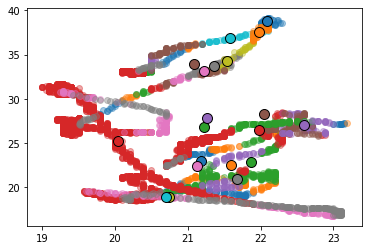

In [30]:
for indexes in clusters:
    plt.scatter(X[indexes,i], X[indexes,j], alpha=0.4)
for c in centers:
    plt.scatter(c[i], c[j], s=100, edgecolors='k')

# OPTICS

In [31]:
from sklearn.cluster import OPTICS

In [32]:
optics = OPTICS(min_samples=5, max_eps=np.inf)
optics.fit(X)

C:\Users\cri98\anaconda3\lib\site-packages\sklearn\cluster\_optics.py:804: RuntimeWarning: divide by zero encountered in true_divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


OPTICS()

In [34]:
optics.labels_[:10]

array([-1, -1, -1, -1, -1, -1, -1, -1,  1,  1])

In [36]:
np.unique(optics.labels_)

array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
        12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
       103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
       116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
       129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
       142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
       155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
       168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 17

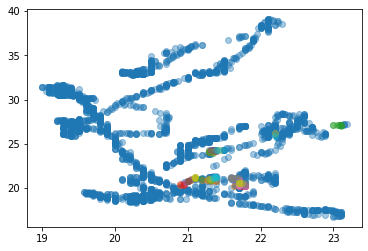

In [38]:
for cluster_id in np.unique(optics.labels_)[:20]:
    indexes = np.where(optics.labels_==cluster_id)
    plt.scatter(X[indexes,i], X[indexes,j], alpha=0.4)

# K-Mode

https://github.com/nicodv/kmodes

In [39]:
!pip install kmodes

In [40]:
from kmodes.kmodes import KModes

In [41]:
km = KModes(n_clusters=4, init='Huang', n_init=5, verbose=1)

clusters = km.fit_predict(X1)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 9868.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 8139.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 8139.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 8139.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 9868.0
Best run was number 2


In [42]:
km.cluster_centroids_

array([['2015-02-04 18:07:00', '0'],
       ['2015-02-07 20:10:59', '0'],
       ['2015-02-04 17:51:00', '1'],
       ['2015-02-07 20:12:00', '0']], dtype='<U19')

In [43]:
km.labels_

array([2, 2, 2, ..., 2, 2, 2], dtype=uint16)

# Rock

https://github.com/annoviko/pyclustering/

In [44]:
from pyclustering.cluster import rock

In [45]:
rc = rock.rock(X2[:100], eps=0.7, number_clusters=4, threshold=0.5)
rc.process()

C:\Users\cri98\anaconda3\lib\site-packages\pyclustering\utils\__init__.py:303: RuntimeWarning: overflow encountered in ubyte_scalars
  distance += (a[i] - b[i])**2.0;


In [46]:
clusters = rc.get_clusters()

In [47]:
clusters

[[0],
 [1],
 [2],
 [3],
 [4],
 [5],
 [6],
 [7],
 [8],
 [9],
 [10],
 [11],
 [12],
 [13],
 [14],
 [15],
 [16],
 [17],
 [18],
 [19],
 [20],
 [21],
 [22],
 [23],
 [24],
 [25],
 [26],
 [27],
 [28],
 [29],
 [30],
 [31],
 [32],
 [33],
 [34],
 [35],
 [36],
 [37],
 [38],
 [39],
 [40],
 [41],
 [42],
 [43],
 [44],
 [45],
 [46],
 [47],
 [48],
 [49],
 [50],
 [51],
 [52],
 [53],
 [54],
 [55],
 [56],
 [57],
 [58],
 [59],
 [60],
 [61],
 [62],
 [63],
 [64],
 [65],
 [66],
 [67],
 [68],
 [69],
 [70],
 [71],
 [72],
 [73],
 [74],
 [75],
 [76],
 [77],
 [78],
 [79],
 [80],
 [81],
 [82],
 [83],
 [84],
 [85],
 [86],
 [87],
 [88],
 [89],
 [90],
 [91],
 [92],
 [93],
 [94],
 [95],
 [96],
 [97],
 [98],
 [99]]

In [48]:
for i, indexes in enumerate(clusters):
    print(i, X2[indexes[:5]])
    #plt.scatter(X2[indexes,1], X2[indexes,2], alpha=0.4)

0 [[1 0 0 ... 0 0 0]]
1 [[0 1 0 ... 0 0 0]]
2 [[0 0 1 ... 0 0 0]]
3 [[0 0 0 ... 0 0 0]]
4 [[0 0 0 ... 0 0 0]]
5 [[0 0 0 ... 0 0 0]]
6 [[0 0 0 ... 0 0 0]]
7 [[0 0 0 ... 0 0 0]]
8 [[0 0 0 ... 0 0 0]]
9 [[0 0 0 ... 0 0 0]]
10 [[0 0 0 ... 0 0 0]]
11 [[0 0 0 ... 0 0 0]]
12 [[0 0 0 ... 0 0 0]]
13 [[0 0 0 ... 0 0 0]]
14 [[0 0 0 ... 0 0 0]]
15 [[0 0 0 ... 0 0 0]]
16 [[0 0 0 ... 0 0 0]]
17 [[0 0 0 ... 0 0 0]]
18 [[0 0 0 ... 0 0 0]]
19 [[0 0 0 ... 0 0 0]]
20 [[0 0 0 ... 0 0 0]]
21 [[0 0 0 ... 0 0 0]]
22 [[0 0 0 ... 0 0 0]]
23 [[0 0 0 ... 0 0 0]]
24 [[0 0 0 ... 0 0 0]]
25 [[0 0 0 ... 0 0 0]]
26 [[0 0 0 ... 0 0 0]]
27 [[0 0 0 ... 0 0 0]]
28 [[0 0 0 ... 0 0 0]]
29 [[0 0 0 ... 0 0 0]]
30 [[0 0 0 ... 0 0 0]]
31 [[0 0 0 ... 0 0 0]]
32 [[0 0 0 ... 0 0 0]]
33 [[0 0 0 ... 0 0 0]]
34 [[0 0 0 ... 0 0 0]]
35 [[0 0 0 ... 0 0 0]]
36 [[0 0 0 ... 0 0 0]]
37 [[0 0 0 ... 0 0 0]]
38 [[0 0 0 ... 0 0 0]]
39 [[0 0 0 ... 0 0 0]]
40 [[0 0 0 ... 0 0 0]]
41 [[0 0 0 ... 0 0 0]]
42 [[0 0 0 ... 0 0 0]]
43 [[0 0 0 ... 0 0 0]

# Transactional Clustering Algorithms in Python 2.7

https://github.com/riccotti/TX-Means